In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##### Template Matching

In [33]:
img = cv2.imread('hmson1.avi_000083291.png',0)
img2 = img.copy()
template = cv2.imread('20201105_125557.png',0)

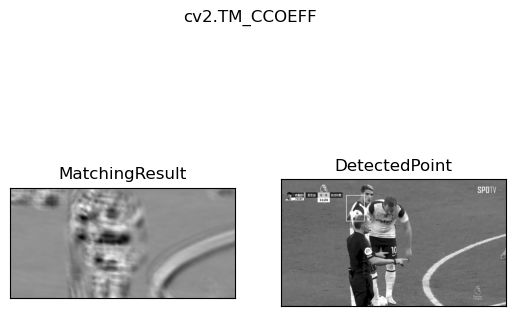

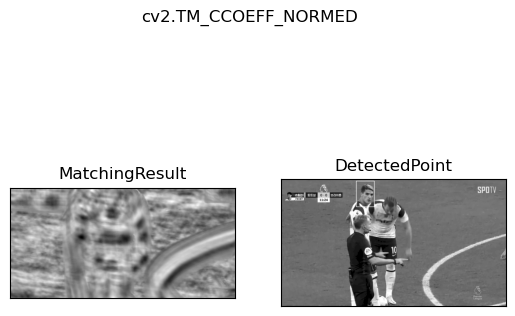

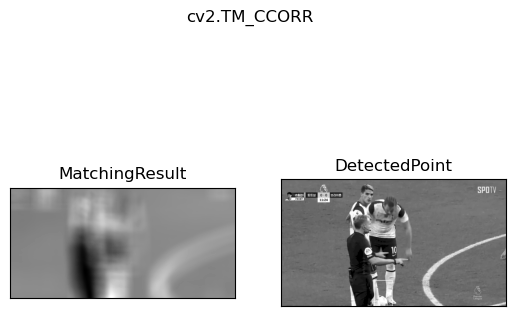

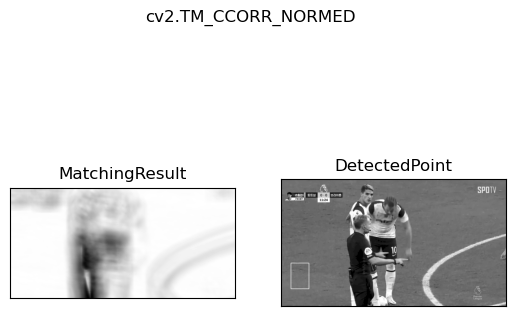

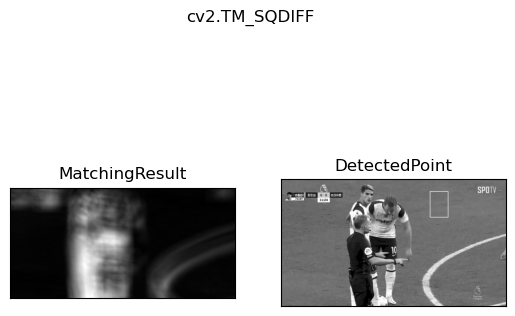

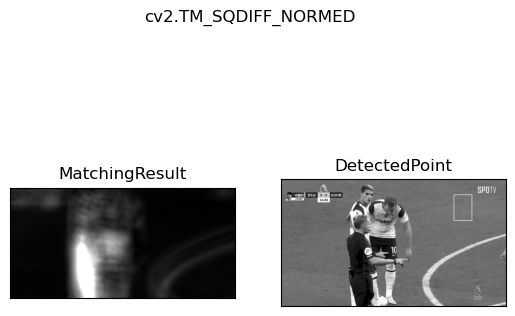

In [34]:
w, h = template.shape[::-1]

#Allthe6methodsforcomparisoninalist
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img= img2.copy()
    method=eval(meth)
    
    #Apply templateMatching
    res= cv2.matchTemplate(img,template,method)
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
 
    #IfthemethodisTM_SQDIFFor TM_SQDIFF_NORMED,takeminimum
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
    bottom_right=(top_left[0]+ w,top_left[1]+h)
 
    cv2.rectangle(img,top_left,bottom_right,255,2)
    
    plt.subplot(121),plt.imshow(res,cmap='gray')
    plt.title('MatchingResult'), plt.xticks([]),plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap='gray')
    plt.title('DetectedPoint'),plt.xticks([]),plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

In [38]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[164:212, 234:276]

w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

In [39]:
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
   cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)

True

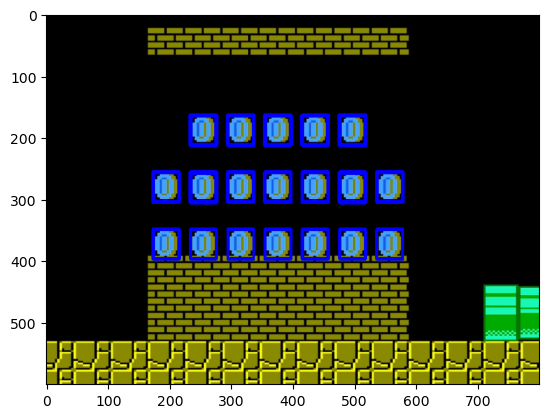

In [40]:
plt.imshow(img_rgb)